In [29]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('JaipurRawData3.csv', index_col='date')
df.head()

,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
date,,,,,,,,,,,,
2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679 entries, 2016-05-01 to 2018-03-11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meantempm      679 non-null    int64  
 1   meandewptm     679 non-null    int64  
 2   meanpressurem  679 non-null    float64
 3   precipm        679 non-null    float64
 4   meanhumidity   679 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 31.8+ KB


In [31]:
print('Shape of Dataset: {}'.format(df.shape))
print('Shape of Each Row: {}'.format(df.iloc[0].shape))
print(df.dtypes)

Shape of Dataset: (679, 12)
Shape of Each Row: (12,)
meantempm          int64
meandewptm         int64
meanpressurem    float64
maxhumidity        int64
minhumidity        int64
maxtempm           int64
mintempm           int64
maxdewptm          int64
mindewptm          int64
maxpressurem       int64
minpressurem       int64
precipm          float64
dtype: object


<AxesSubplot: >

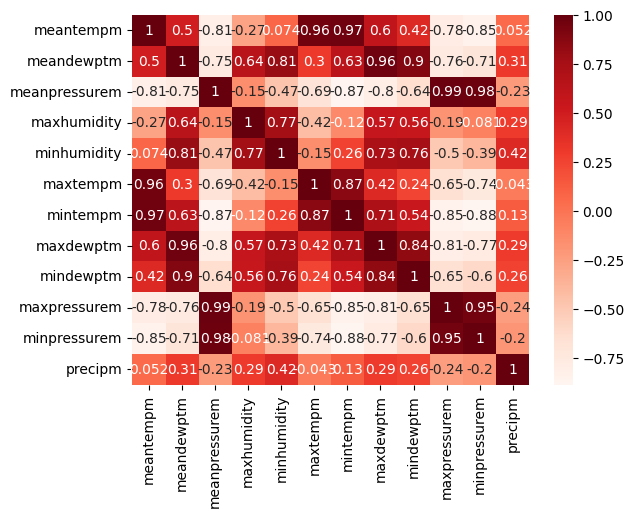

In [32]:

cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)


In [33]:
def min_max_to_mean(df, input_columns, output_column_name):
    df[output_column_name] = (df[input_columns[0]] + df[input_columns[1]])/ 2
    df.drop(input_columns, axis=1, inplace=True)
    return df 

In [34]:
df = min_max_to_mean(df, ['maxhumidity', 'minhumidity'], 'meanhumidity')
df.drop(['maxtempm', 'mintempm', 'maxdewptm', 'mindewptm', 'maxpressurem', 'minpressurem'], axis=1, inplace=True)

<AxesSubplot: >

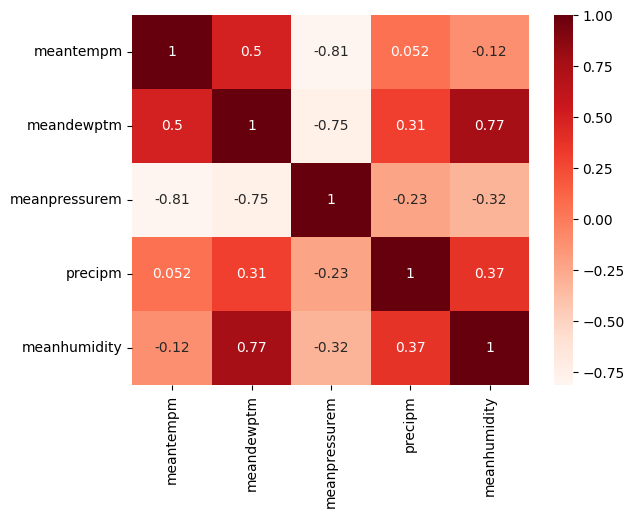

In [35]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17436\1343106389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['meanhumidity'])


<AxesSubplot: xlabel='meanhumidity', ylabel='Density'>

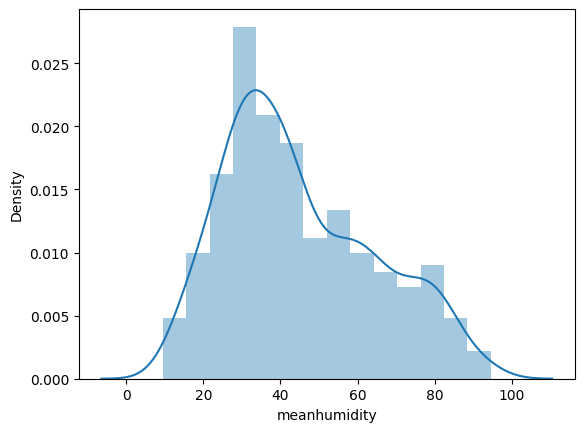

In [53]:
sns.distplot(df['meanhumidity'])